In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as graph
import seaborn as sns
from IPython.display import display, HTML

import pykalman
from statsmodels.nonparametric.smoothers_lowess import lowess

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

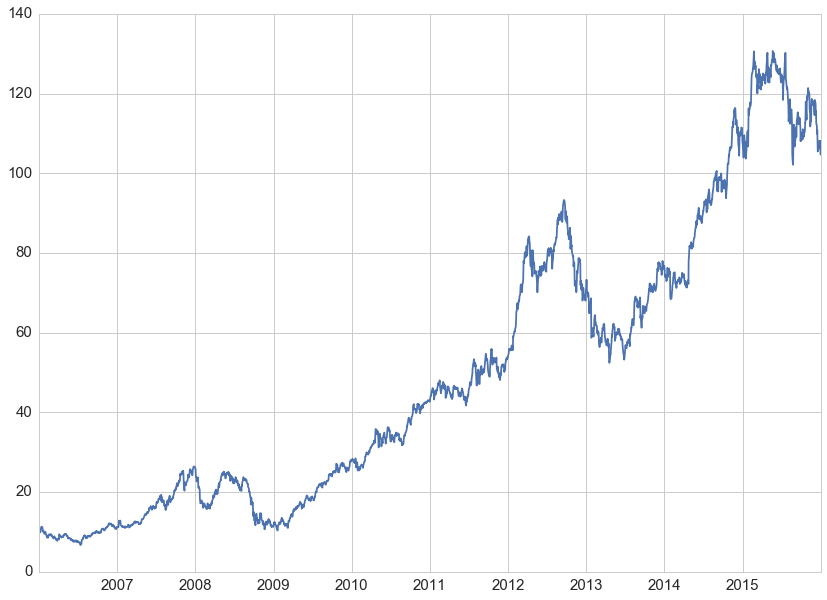

In [2]:
symbol = web.DataReader('AAPL', 'yahoo', dt.datetime(2006, 1, 1), dt.datetime(2016, 1, 1))

graph.figure(figsize=(14, 10))
graph.plot(symbol['Adj Close'])
graph.show()

## Kalman vs LOWESS smoothing

C:\Users\Anthony\Miniconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


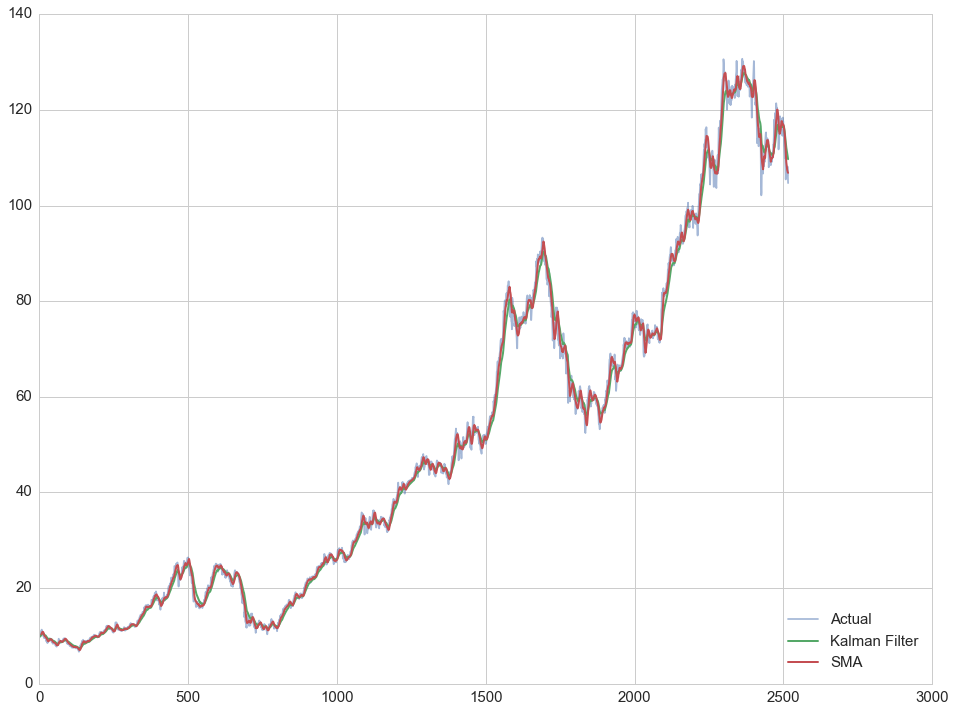

In [3]:
# Data shuffling
y = symbol['Adj Close'].values
x = symbol.index.values

kf = pykalman.KalmanFilter(
    transition_matrices= [1],
    initial_state_mean = y[0],
    initial_state_covariance = 1,
    observation_covariance = 1,
    transition_covariance = 0.01
)

means, _ = kf.filter(y)

graph.figure(figsize=(16, 12))
graph.plot(y, alpha=0.5, label='Actual')
graph.plot(means, linewidth=2, label='Kalman Filter')
graph.plot(pd.rolling_mean(y, 8), linewidth=2, label='SMA')
graph.legend(loc='lower right')
graph.show()